# Concentration at Place

This notebook contains an initial analysis on the level of concentration based on the offense dataset.

Rudolf Maculan
ETH Zurich
05-05-2017

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('/Users/rudimac/Documents/MTEC/THESIS/Datasets_RAW/offences/offences_ag_gridded.csv')
grid = pd.read_csv('/Users/rudimac/Documents/MTEC/THESIS/QGIS/grids/grid_FINAL_filtered.csv')

In [3]:
data = data.sort('to_date')

/Users/rudimac/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [519]:
data

event_id    locality_general  locality_encoded  \
2191  20002195              Wohnen                 1   
2188  20002189              Wohnen                 1   
2187  20002188              Wohnen                 1   
2186  20002185              Wohnen                 1   
2190  20002194              Wohnen                 1   
2189  20002193              Wohnen                 1   
2192  20002196              Wohnen                 1   
2193  20002197              Wohnen                 1   
2194  20002200              Wohnen                 1   
2195  20002201              Wohnen                 1   
2196  20002202              Wohnen                 1   
1922  20002187              Wohnen                 1   
67    20002199              Wohnen                 1   
2199  20002205              Wohnen                 1   
134   20002210              Wohnen                 1   
2174  20002206              Wohnen                 1   
2197  20002203  �ffent.Einrichtung                 7   
2198  20002204      Dienstleistung                 2   
2202  20002208              Wohnen                 1   
2201  20002207      Dienstleistung                 2   
6972  20002209              Wohnen                 1   
2207  20002215              Wohnen                 1   
2203  20002212              Wohnen                 1   
2209  20002217      Dienstleistung                 2   
2208  20002216              Wohnen                 1   
2206  20002214              Wohnen                 1   
363   20002211             Geb�ude                 4   
2210  20002218  �ffent.Einrichtung                 7   
2205  20002213              Wohnen                 1   
2211  20002222              Wohnen                 1   
...        ...                 ...               ...   
265   20025181              Wohnen                 1   
6591  20025182              Wohnen                 1   
6592  20025183              Wohnen                 1   
6561  20025167              Wohnen                 1   
6602  20025214              Wohnen                 1   
6601  20025211              Wohnen                 1   
6595  20025189              Wohnen                 1   
6596  20025192             Geb�ude                 4   
6594  20025187             Verkauf                 5   
6593  20025184              Wohnen                 1   
7406  20025188              Wohnen                 1   
7268  20025185              Wohnen                 1   
6598  20025240              Wohnen                 1   
583   20025239              Wohnen                 1   
7400  20025233              Wohnen                 1   
263   20025234             Verkauf                 5   
6603  20025216              Wohnen                 1   
6604  20025226              Wohnen                 1   
6600  20025209             Geb�ude                 4   
6597  20025205              Wohnen                 1   
7408  20025230              Wohnen                 1   
7407  20025268              Wohnen                 1   
515   20025282              Wohnen                 1   
6656  20025292              Wohnen                 1   
6654  20025284              Wohnen                 1   
6605  20025228      Dienstleistung                 2   
6590  20025283              Wohnen                 1   
6659  20025300              Wohnen                 1   
6658  20025299              Wohnen                 1   
6657  20025297  �ffent.Einrichtung                 7   

             locality_specific  locationx  locationy   from_date  \
2191           Einfamilienhaus     655013     249976  2013-12-31   
2188                   Wohnung     668820     244589  2013-12-31   
2187           Einfamilienhaus     671222     249782  2013-12-31   
2186                   Wohnung     646946     249001  2014-01-01   
2190           Einfamilienhaus     655012     251828  2013-12-31   
2189                   Wohnung     662662     251835  2013-12-31   
2192                   Wohnung     664289     260224  201

In [14]:
data.isnull().sum()

event_id               0
locality_general       0
locality_encoded       0
locality_specific      0
locationx              0
locationy              0
from_date            197
from_timestamp       470
from_time            470
to_date                0
to_timestamp          88
to_time               88
time_interval          0
grid_id                0
xmin                   0
xmax                   0
ymin                   0
ymax                   0
dtype: int64

In [78]:
years = pd.Series([2014,2015,2016])

In [79]:
yearly_off = pd.DataFrame(data=np.zeros((10176,3)),columns=years,index=grid['id'].values)

In [83]:
yearly_off.describe()

2014          2015          2016
count  10176.000000  10176.000000  10176.000000
mean       0.261891      0.214819      0.201454
std        0.748664      0.638056      0.597210
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000
75%        0.000000      0.000000      0.000000
max       25.000000     13.000000      8.000000

In [82]:
count = 0
for i in data.itertuples():
    #print i.to_date[:4]
    try:
        yearly_off.loc[i.grid_id][int(i.to_date[:4])] +=1
    except KeyError:
        count += 1
print 'Number of outside labels:', count

Number of outside labels: 513


In [25]:
float(2665)/10176

0.2618907232704403

In [480]:
print 'offences by year \n'
print '2014: ', yearly_off[2014].sum()
print '2015: ', yearly_off[2015].sum()
print '2016: ', yearly_off[2016].sum()
years = np.array([2014,2015,2016])

offences by year 

2014:  2665.0
2015:  2186.0
2016:  2050.0


In [468]:
print '100% concentration \n'
print '2014: ', yearly_off[yearly_off[2014] > 0][2014].sum()/2665*100,'% /',float(yearly_off[yearly_off[2014] > 0][2014].count())/10176*100,'%'
print '2015: ', yearly_off[yearly_off[2015] > 0][2015].sum()/2186*100,'% /',float(yearly_off[yearly_off[2015] > 0][2015].count())/10176*100,'%'
print '2016: ', yearly_off[yearly_off[2016] > 0][2016].sum()/2050*100,'% /',float(yearly_off[yearly_off[2016] > 0][2016].count())/10176*100,'%'
hundred = [float(yearly_off[yearly_off[2014] > 0][2014].count())/10176*100,
                            float(yearly_off[yearly_off[2015] > 0][2015].count())/10176*100,
                            float(yearly_off[yearly_off[2016] > 0][2016].count())/10176*100]

100% concentration 

2014:  100.0 % / 16.9811320755 %
2015:  100.0 % / 14.6422955975 %
2016:  100.0 % / 14.052672956 %


In [479]:
print '80% concentration \n'
print '2014: ', yearly_off[yearly_off[2014] > 0][2014].sample(1400).sum()/2665*100,'% /',float(1400)/10176 *100,'%'
print '2015: ', yearly_off[yearly_off[2015] > 0][2015].sample(1180).sum()/2186*100,'% /',float(1180)/10176 *100,'%'
print '2016: ', yearly_off[yearly_off[2016] > 0][2016].sample(1156).sum()/2050*100,'% /',float(1256)/10176 *100,'%'
eighty = np.array([float(1400)/10176 *100, float(1180)/10176 *100, float(1256)/10176 *100])

80% concentration 

2014:  82.0262664165 % / 13.7578616352 %
2015:  78.8655077768 % / 11.5959119497 %
2016:  80.6341463415 % / 12.3427672956 %


In [469]:
print '50% concentration \n'
print '2014: ', yearly_off[yearly_off[2014] > 0][2014].sample(881).sum()/2665*100,'% /',float(881)/10176 *100,'%'
print '2015: ', yearly_off[yearly_off[2015] > 0][2015].sample(745).sum()/2186*100,'% /',float(745)/10176 *100,'%'
print '2016: ', yearly_off[yearly_off[2016] > 0][2016].sample(716).sum()/2050*100,'% /',float(716)/10176 *100,'%'
fifty = [float(881)/10176 *100],[float(745)/10176*100],[float(716)/10176 *100]

50% concentration 

2014:  51.4071294559 % / 8.65762578616 %
2015:  50.7319304666 % / 7.32114779874 %
2016:  49.6097560976 % / 7.03616352201 %


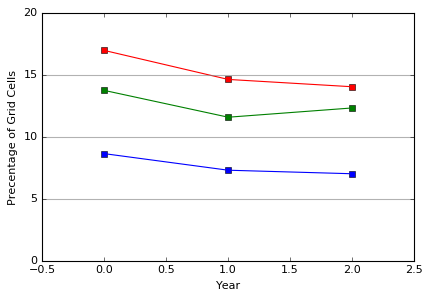

In [489]:
plt.plot(hundred, 'rs', hundred, 'r')
plt.plot(eighty,'gs', eighty, 'g')
plt.plot(fifty,'bs', fifty, 'b')
plt.xlim([-0.5,2.5])
plt.ylim([0,20])
#plt.xticks(hundred, ['2014','2015','2016'])
plt.xlabel('Year')
plt.ylabel('Precentage of Grid Cells')
plt.axhline(y=5, xmin=0, xmax=1,color='grey',alpha=0.6)
plt.axhline(y=10, xmin=0, xmax=1,color='grey',alpha=0.6)
plt.axhline(y=15, xmin=0, xmax=1,color='grey',alpha=0.6)

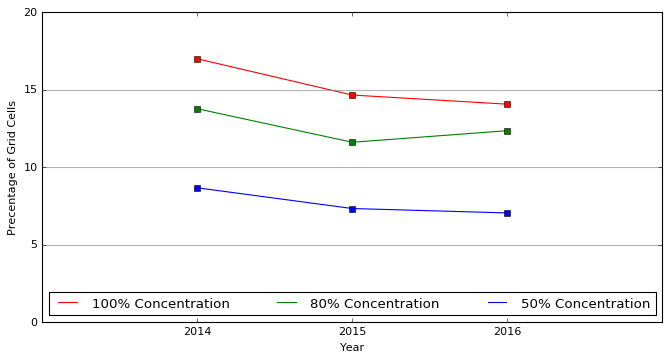

In [518]:
plt.figure(figsize=(10,5))
plt.plot(years,hundred, 'r')
plt.plot(years,eighty, 'g')
plt.plot(years,fifty, 'b')

plt.plot(years,hundred, 'rs')
plt.plot(years,eighty,'gs') 
plt.plot(years,fifty,'bs')

my_xticks = ['2014', '2015', '2016']
plt.xticks(years, my_xticks)
plt.xlim(2013,2017)
plt.ylim(0,20)
plt.xlabel('Year')
plt.ylabel('Precentage of Grid Cells')
plt.legend(['100% Concentration','80% Concentration','50% Concentration'],mode="expand",ncol=3,loc=3)

plt.axhline(y=5, xmin=0, xmax=1,color='grey',alpha=0.6)
plt.axhline(y=10, xmin=0, xmax=1,color='grey',alpha=0.6)
plt.axhline(y=15, xmin=0, xmax=1,color='grey',alpha=0.6)

In [5]:
months = ['2014-01','2014-02','2014-03','2014-04','2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11',
          '2014-12','2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10',
          '2015-11','2015-12','2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09',
         '2016-10','2016-11','2016-12','2017-01','2017-02']
monthly_off = pd.DataFrame(data=np.zeros((10176,38)),columns=months,index=grid['id'].values)

In [6]:
count = 0
for i in data.itertuples():
    #print i.to_date[:7]
    try:
        monthly_off.loc[i.grid_id][i.to_date[:7]] += 1
    except KeyError:
        count += 1
print 'Number of outside labels:', count

Number of outside labels: 205


In [26]:
offences_per_month = []
concentration_month = []
for month in months:
    print (monthly_off[monthly_off[month] > 0][month].sum(),'offences /',
           float(monthly_off[monthly_off[month] > 0][month].count())/10176*100,'%','('
          (monthly_off[monthly_off[month] > 0][month].sum()/10176*100))
    offences_per_month.append(monthly_off[monthly_off[month] > 0][month].sum())
    concentration_month.append(float(monthly_off[monthly_off[month] > 0][month].count())/10176*100)

(240.0, 'offences /', 2.1422955974842766, '%', 2.358490566037736)
(223.0, 'offences /', 1.945754716981132, '%', 2.1914308176100628)
(184.0, 'offences /', 1.650943396226415, '%', 1.8081761006289307)
(213.0, 'offences /', 1.8278301886792452, '%', 2.0931603773584904)
(192.0, 'offences /', 1.7393867924528301, '%', 1.8867924528301887)
(225.0, 'offences /', 1.8966194968553458, '%', 2.2110849056603774)
(240.0, 'offences /', 2.1324685534591192, '%', 2.358490566037736)
(186.0, 'offences /', 1.6804245283018868, '%', 1.8278301886792452)
(187.0, 'offences /', 1.7099056603773584, '%', 1.8376572327044025)
(225.0, 'offences /', 1.9064465408805031, '%', 2.2110849056603774)
(272.0, 'offences /', 2.240566037735849, '%', 2.6729559748427674)
(273.0, 'offences /', 2.279874213836478, '%', 2.6827830188679247)
(138.0, 'offences /', 1.2185534591194969, '%', 1.3561320754716981)
(185.0, 'offences /', 1.6018081761006289, '%', 1.818003144654088)
(232.0, 'offences /', 1.955581761006289, '%', 2.279874213836478)
(134

In [19]:
x_axis = range(0,38)

In [16]:
def two_scales(ax1, months, data1, data2, c1, c2):
    
    ax2 = ax1.twinx()

    ax1.plot(months, data1, 'rs', months, data1, 'r' )
    ax1.set_xlabel('Months')
    ax1.set_ylabel('Total Crime Incidents')
    ax1.set_xlim(-2,40)
    ax1.set_xticks(range(0,38) , months)
    ax1.set_ylim(0,300)

    ax2.plot(months, data2, color=c2)
    ax2.set_ylabel('100% Concentration')
    ax2.set_xticks(range(0,38) , months)
    ax2.set_ylim(0,20)
    return ax1, ax2

In [17]:
# Change color of each axis
def color_y_axis(ax, color):

    for t in ax.get_yticklabels():
        t.set_color(color)
    return None

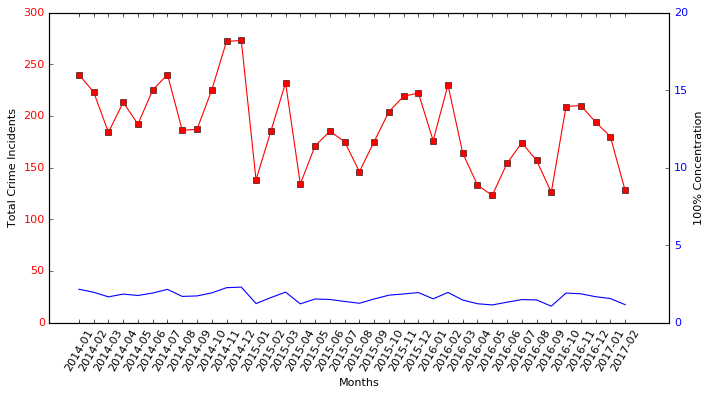

In [20]:
# Create axes
fig, ax = plt.subplots(figsize=(10,5))
ax1, ax2 = two_scales(ax, x_axis, offences_per_month, concentration_month, 'r', 'b')
color_y_axis(ax1, 'r')
color_y_axis(ax2, 'b')
#plt.axhline(y=5, xmin=0, xmax=1,color='blue',alpha=0.3)
#plt.axhline(y=10, xmin=0, xmax=1,color='blue',alpha=0.3)
#plt.axhline(y=15, xmin=0, xmax=1,color='blue',alpha=0.3)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(range(38) , months, rotation=60)
plt.show()

In [21]:
print 'Mean offences per month: ', np.mean(offences_per_month),'(',np.std(offences_per_month),')'

Mean offences per month:  189.578947368 ( 38.6853920335 )


In [22]:
print 'Mean concentration per month: ', np.mean(concentration_month),'(',np.std(concentration_month),')'

Mean concentration per month:  1.64600090234 ( 0.321932986809 )
